In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [2]:
sigma=2.3

In [3]:
def Normal(x, mu, sigma):
    return np.exp(-((x-mu)**2)/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

In [4]:
def p_(x):
    return np.exp(np.sin(x))

In [5]:
def q(x):
    return Normal(x, 0, sigma)

In [6]:
x_range = np.arange(-np.pi, np.pi, 0.05)
print(x_range)

[-3.14159265 -3.09159265 -3.04159265 -2.99159265 -2.94159265 -2.89159265
 -2.84159265 -2.79159265 -2.74159265 -2.69159265 -2.64159265 -2.59159265
 -2.54159265 -2.49159265 -2.44159265 -2.39159265 -2.34159265 -2.29159265
 -2.24159265 -2.19159265 -2.14159265 -2.09159265 -2.04159265 -1.99159265
 -1.94159265 -1.89159265 -1.84159265 -1.79159265 -1.74159265 -1.69159265
 -1.64159265 -1.59159265 -1.54159265 -1.49159265 -1.44159265 -1.39159265
 -1.34159265 -1.29159265 -1.24159265 -1.19159265 -1.14159265 -1.09159265
 -1.04159265 -0.99159265 -0.94159265 -0.89159265 -0.84159265 -0.79159265
 -0.74159265 -0.69159265 -0.64159265 -0.59159265 -0.54159265 -0.49159265
 -0.44159265 -0.39159265 -0.34159265 -0.29159265 -0.24159265 -0.19159265
 -0.14159265 -0.09159265 -0.04159265  0.00840735  0.05840735  0.10840735
  0.15840735  0.20840735  0.25840735  0.30840735  0.35840735  0.40840735
  0.45840735  0.50840735  0.55840735  0.60840735  0.65840735  0.70840735
  0.75840735  0.80840735  0.85840735  0.90840735  0

In [7]:
M = np.max(p_(x_range)/q(x_range))
print(M)

20.9088533081861


In [8]:
n_iters = 0
n_samples = 0
samples = []
while n_samples <= 10000:
    n_iters += 1
    z = np.random.normal(0, sigma) # remember here stdev is required
    u = np.random.uniform(0, M*q(z))
    if u <= p_(z):
        samples.append(z)
        n_samples += 1
        if n_samples % 100 == 0:
            print("=", end='')
samples = [x for x in samples if x >= -np.pi and x <= np.pi]

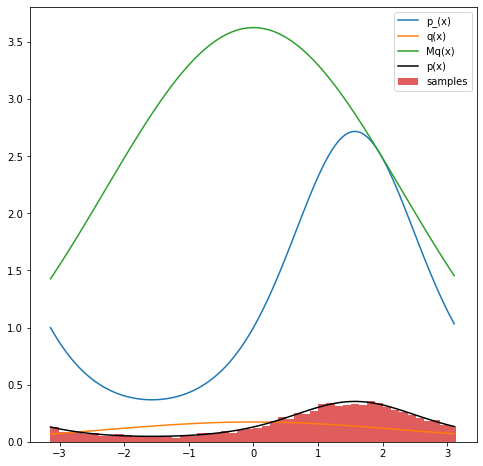

In [9]:
plt.figure(figsize=(8,8))
plt.plot(x_range, p_(x_range))
plt.plot(x_range, q(x_range))
plt.plot(x_range, M*q(x_range))
plt.legend(['p_(x)', 'q(x)', 'Mq(x)'])
plt.savefig("rejection_envelope.png")
plt.hist(samples, 50, density=True, alpha =0.75)
plt.plot(x_range, 0.13*p_(x_range), color='black')
plt.legend(['p_(x)', 'q(x)', 'Mq(x)', 'p(x)', 'samples'])
plt.savefig('rejection_final.png')
plt.show()

In [11]:
print(" Acceptance rate =", 100*n_samples/n_iters, "%")

 Acceptance rate = 52.7701561840439 %
